In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
# 다중 회귀분석
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [68]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [69]:
data = pd.read_csv('../file/data_ver4.csv')

In [70]:
data

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,평균 바다 표면 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167,16.461667,18.033333,93.675000
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667,16.588333,18.178333,96.033333
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667,16.685833,18.230833,96.666667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333,16.413333,18.031667,93.850000
9,2000,2.952604,25637.87,6.11,1.750909,9.457500,16.460833,18.065833,96.416667


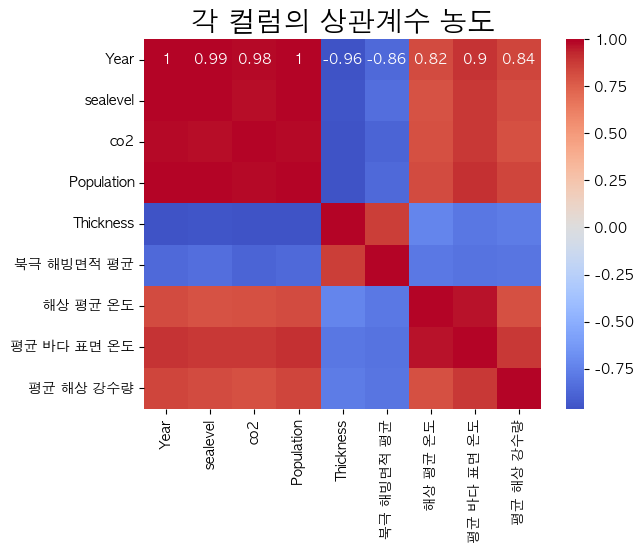

In [71]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('각 컬럼의 상관계수 농도',size=20)
plt.show()

In [72]:
test1 = data.drop(columns='Year')

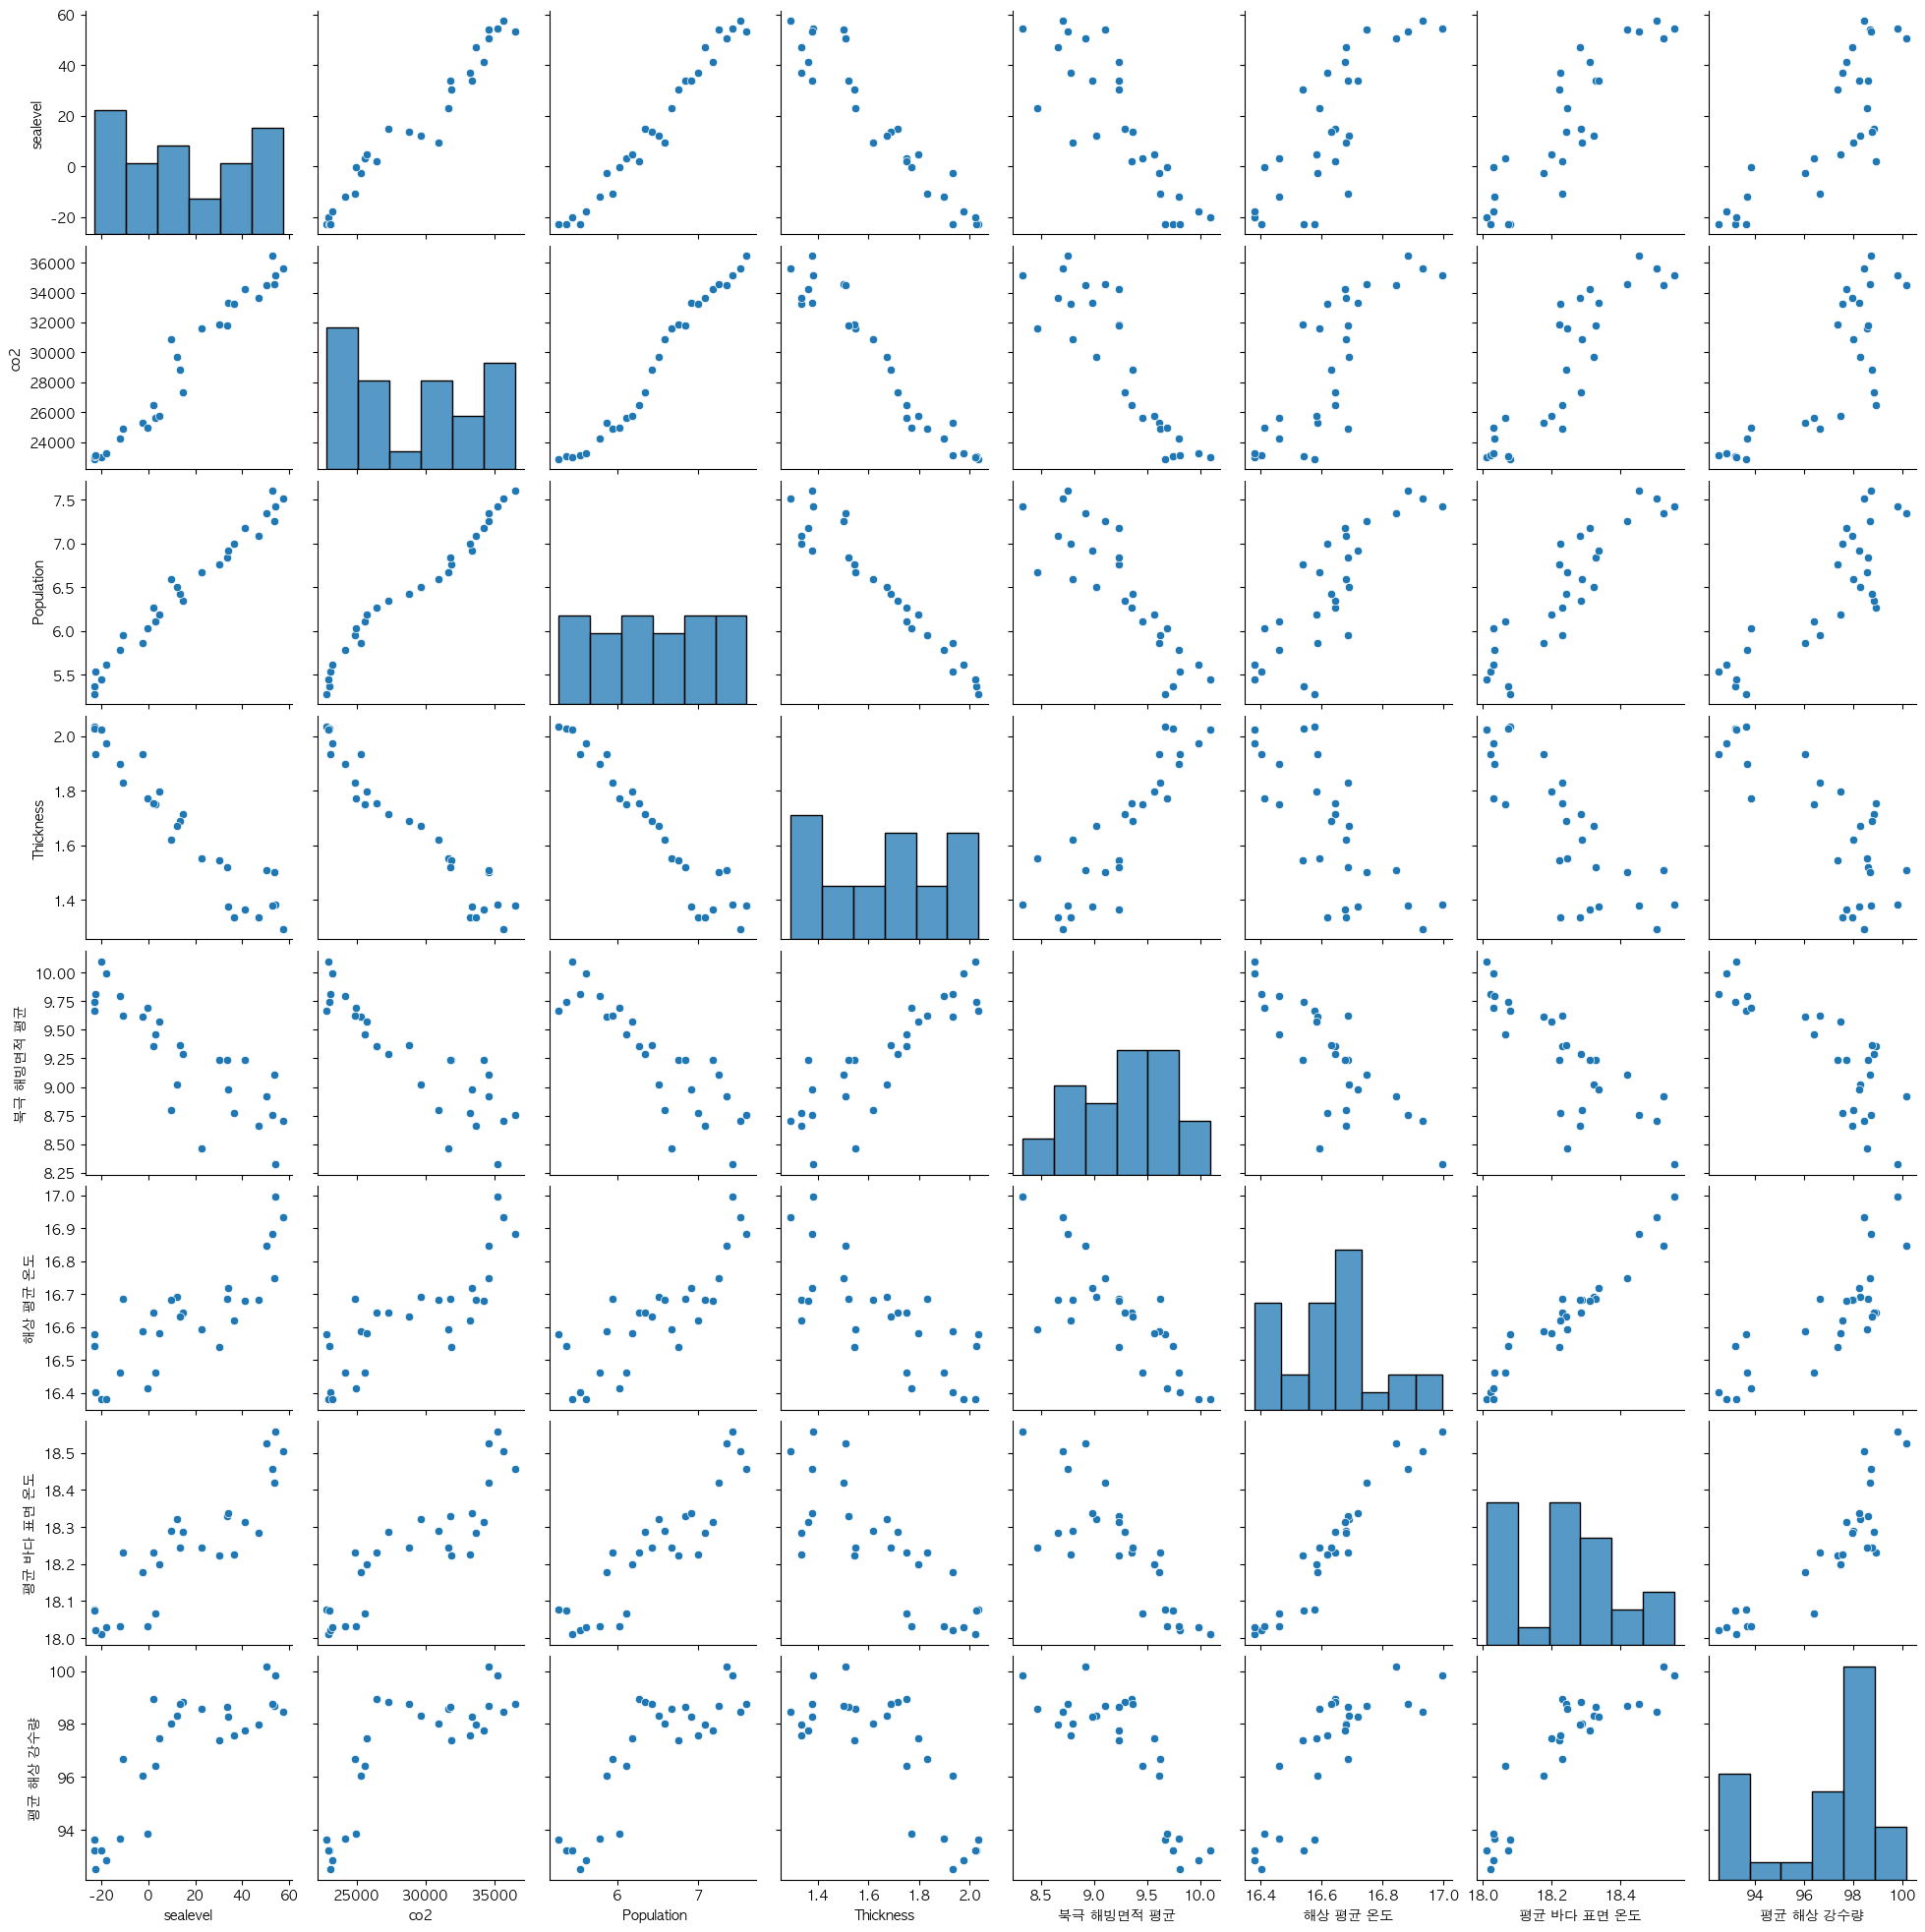

In [73]:
sns.pairplot(test1)
plt.show()

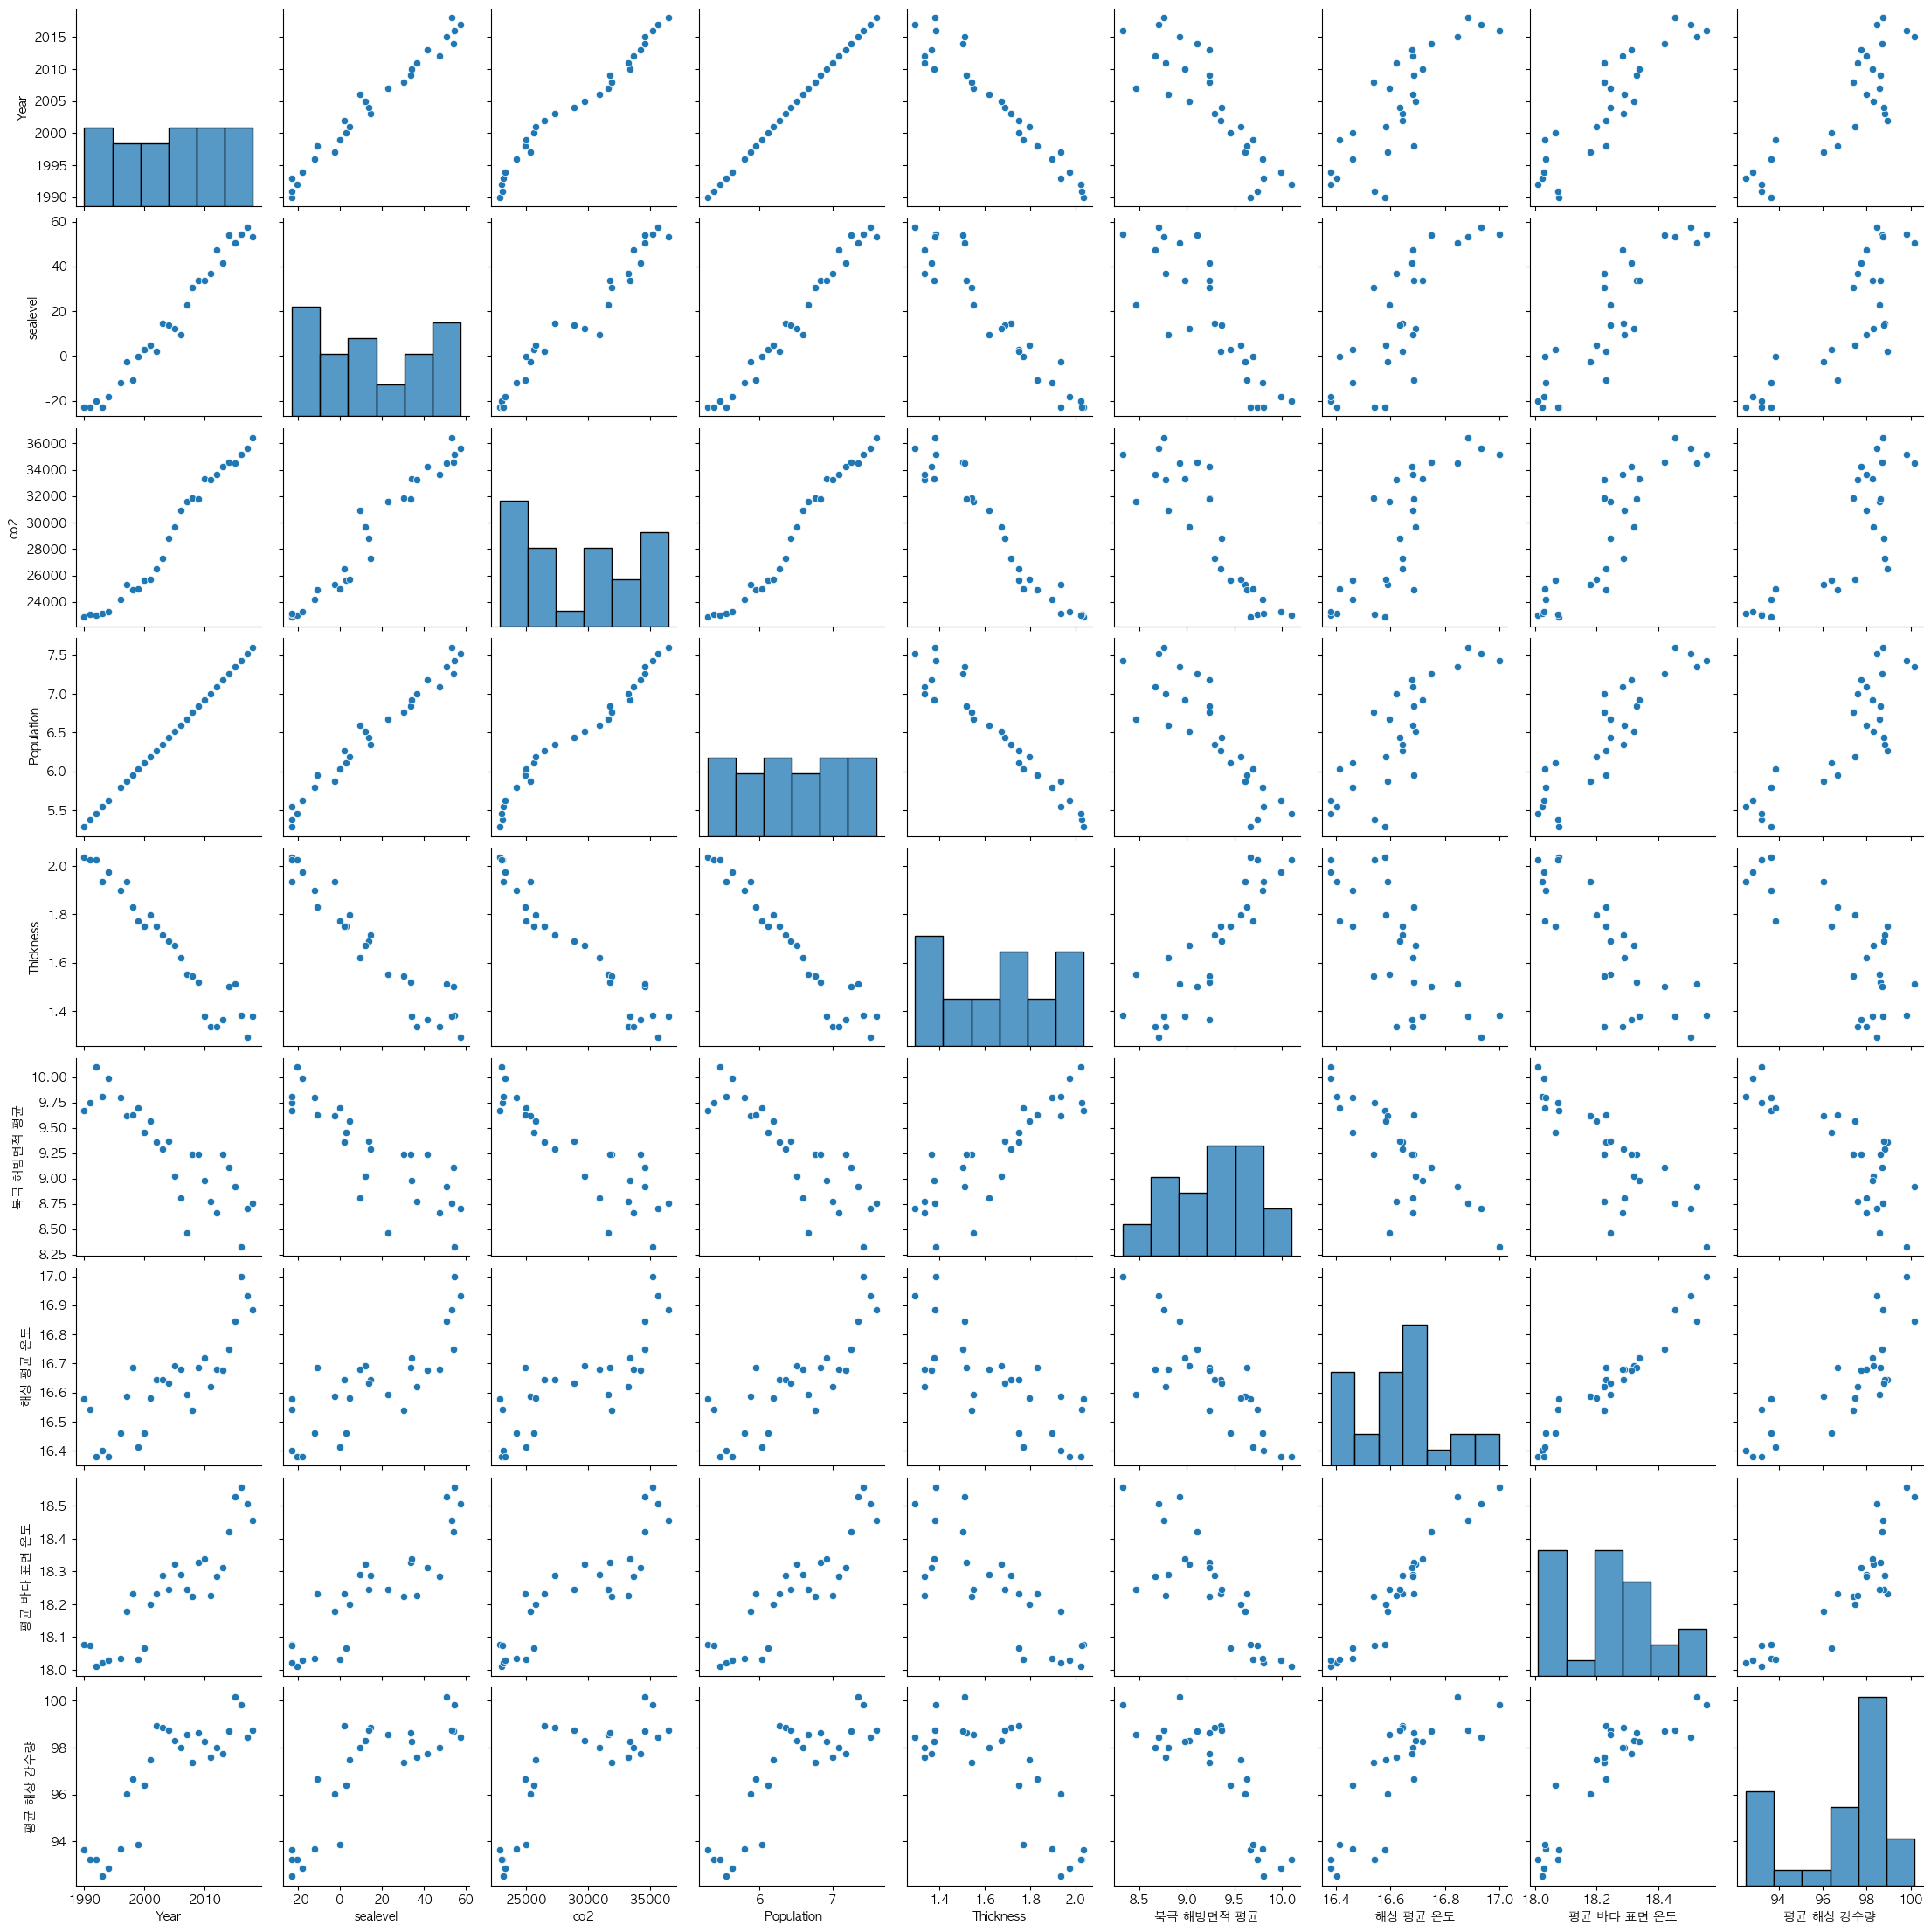

In [74]:
sns.pairplot(data)
plt.show()

---
## 컬럼 설명
- 년도
- 해수면 : 단위 ( mm   1993-2008average
- 온실가스 : 단위 (메가톤($10^6$)t
- 인구 : 단위 (10억명
- Thickness : 북극 해빙 부피(단위 ($10^{12}$)L
- 북극 해빙면적 평균 : 단위( ($10^6$)km2
- 해상표면 평균 온도 : 단위 ( 'c 
- 해상 평균 온도 : 단위 ( 'c 
- 지구 평균 온도 : 단위 ( 'c 
- 평균 해상 강수량 : 단위 ( mm

In [75]:
data.tail()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,평균 바다 표면 온도,평균 해상 강수량
23,2014,53.857372,34558.59,7.26,1.503155,9.105000,16.749167,18.420833,98.700000
24,2015,50.461706,34521.91,7.35,1.510779,8.920833,16.845833,18.526667,100.175000
25,2016,54.346964,35160.60,7.43,1.383348,8.325000,16.997500,18.558333,99.825000
26,2017,57.355991,35588.70,7.52,1.293283,8.706667,16.932500,18.505833,98.466667
27,2018,53.085122,36441.55,7.60,1.380304,8.755000,16.884167,18.455833,98.741667


---
## 컬럼 산점도

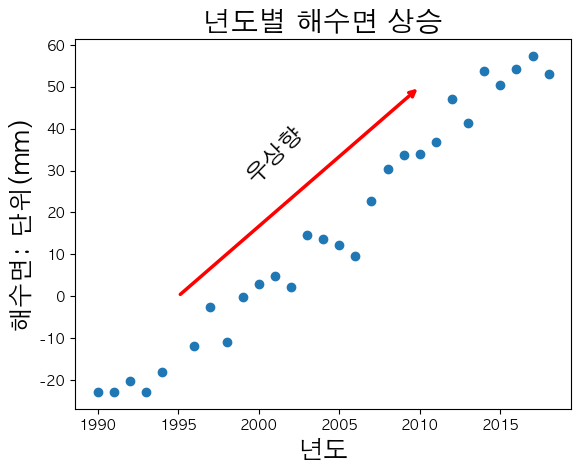

In [76]:
plt.scatter(data['Year'],data['sealevel'])
plt.title('년도별 해수면 상승',size=20)
plt.xlabel('년도',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(2010,50), # 화살표 머리부분
        xytext=(1995,0),      # 화살표 꼬리
        xycoords='data',       # 좌표체계
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,
                        )
        )
plt.annotate("우상향", 
             xy=(2001,27),
             rotation=45,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

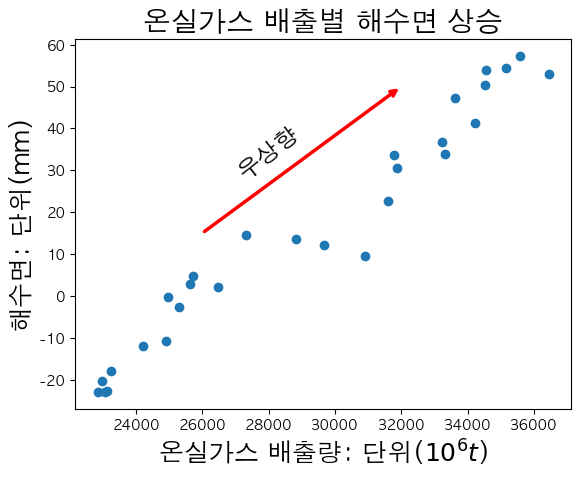

In [77]:
plt.scatter(data['co2'],data['sealevel'])
plt.title('온실가스 배출별 해수면 상승',size=20)

plt.xlabel('온실가스 배출량: 단위($ 10^6t $)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(32000,50), # 화살표 머리부분
        xytext=(26000,15),      # 화살표 꼬리
        xycoords='data',  # 좌표체계
        ha='center',     
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )
plt.annotate("우상향", 
             xy=(28000,28),
             rotation=38,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

In [78]:
data['co2']

0     22849.92
1     23056.40
2     22988.29
3     23124.00
4     23260.29
5     24214.92
6     25292.92
7     24895.32
8     24957.30
9     25637.87
10    25726.42
11    26486.63
12    27308.37
13    28826.48
14    29663.75
15    30905.93
16    31608.28
17    31856.76
18    31769.89
19    33328.38
20    33226.01
21    33620.34
22    34217.18
23    34558.59
24    34521.91
25    35160.60
26    35588.70
27    36441.55
Name: co2, dtype: float64

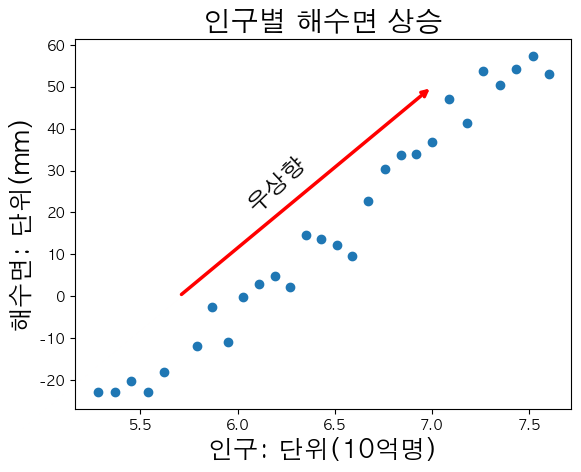

In [79]:
plt.scatter(data[' Population'],data['sealevel'])
plt.title('인구별 해수면 상승',size=20)

plt.xlabel('인구: 단위(10억명)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(7.0,50), # 화살표 머리부분
        xytext=(5.7,0),      # 화살표 꼬리
        xycoords='data',       # 좌표체계
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )
plt.annotate("우상향", 
             xy=(6.2,20),
             rotation=43,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

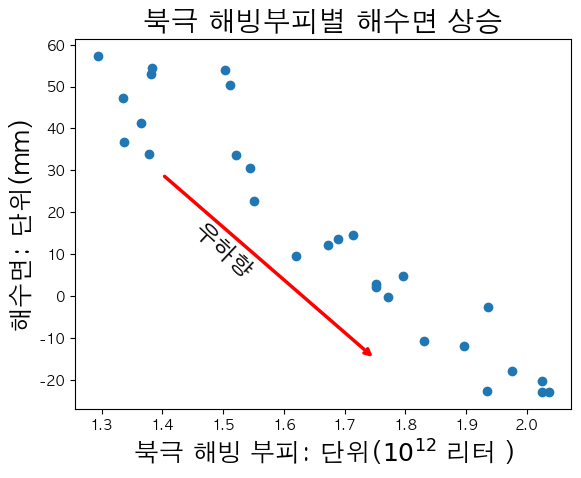

In [80]:
plt.scatter(data['Thickness'],data['sealevel'])
plt.title('북극 해빙부피별 해수면 상승',size=20)
plt.xlabel('북극 해빙 부피: 단위($10^{12}$ 리터 )',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(1.75,-15), # 화살표 머리부분
        xytext=(1.4,29),      # 화살표 꼬리
        xycoords='data',       # 좌표체계
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )
plt.annotate("우하향", 
             xy=(1.5,4),
             rotation=317,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

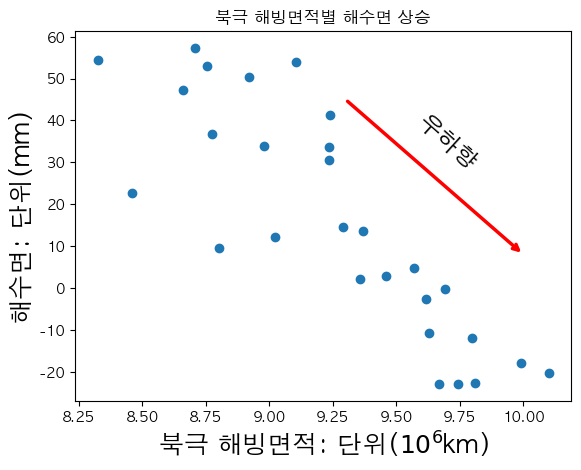

In [81]:
plt.scatter(data['북극 해빙면적 평균'],data['sealevel'])
plt.title('북극 해빙면적별 해수면 상승')

plt.xlabel('북극 해빙면적: 단위($10^6$km)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(10.00,8), # 화살표 머리부분
        xytext=(9.3,45),      # 화살표 꼬리
        xycoords='data',  # 좌표체계
        ha='center',     
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )
plt.annotate("우하향", 
             xy=(9.7,28),
             rotation=318,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

In [82]:
data = data.rename(columns={'해상 평균 온도' : '지구 평균 온도'})

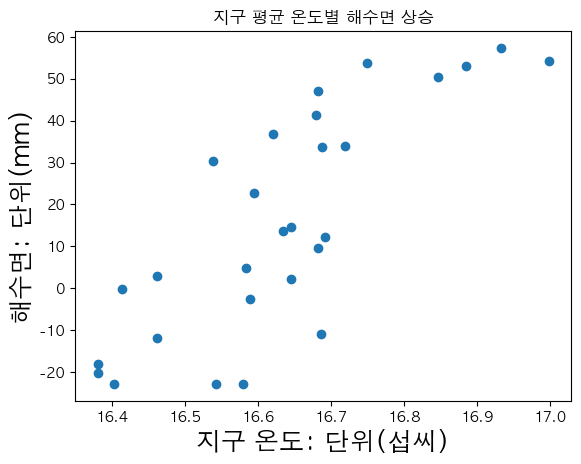

In [83]:
plt.scatter(data['지구 평균 온도'],data['sealevel'])
plt.title('지구 평균 온도별 해수면 상승')

plt.xlabel('지구 온도: 단위(섭씨)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(18.25,50), # 화살표 머리부분
        xytext=(18.1,18),      # 화살표 꼬리
        xycoords='data',  # 좌표체계
        ha='center',     
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )

plt.annotate("우상향", 
             xy=(18.15,30),
             rotation=46,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

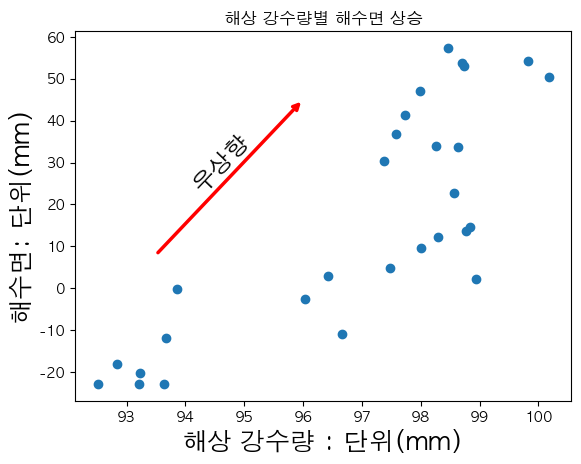

In [84]:
plt.scatter(data['평균 해상 강수량'],data['sealevel'])
plt.title('해상 강수량별 해수면 상승')

plt.xlabel('해상 강수량 : 단위(mm)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(96,45), # 화살표 머리부분
        xytext=(93.5,8),      # 화살표 꼬리
        xycoords='data',  # 좌표체계
        ha='center',     
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )

plt.annotate("우상향", 
             xy=(94.6,23),
             rotation=46,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

In [85]:
data.head()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,지구 평균 온도,평균 바다 표면 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667


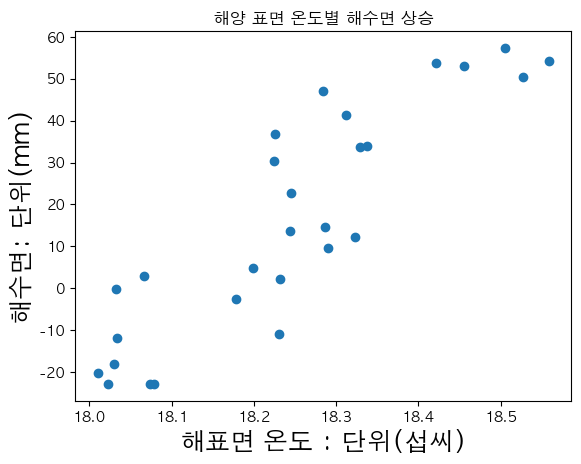

In [86]:
plt.scatter(data['평균 바다 표면 온도'],data['sealevel'])
plt.title('해양 표면 온도별 해수면 상승')

plt.xlabel('해표면 온도 : 단위(섭씨)',size=18)
plt.ylabel('해수면: 단위(mm)',size=18)

plt.annotate('',
        xy=(16.59,50), # 화살표 머리부분
        xytext=(16.42,20),      # 화살표 꼬리
        xycoords='data',  # 좌표체계
        ha='center',     
        arrowprops=dict(arrowstyle="->",        
                        color="red",
                        lw=2.5,

                        )
        )

plt.annotate("우상향", 
             xy=(16.46,31),
             rotation=46,
             va='baseline',
             ha='center',
             fontsize=17
        )

plt.show()

In [116]:
data.head()

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,지구 평균 온도,평균 바다 표면 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667


In [87]:
print(data['평균 해상 강수량'].describe(),'\t\n')
print(data[' Population'].describe(),'\t\n')
print(data['Thickness'].describe(),'\t\n')
print(data['co2'].describe(),'\t\n')
print(data['sealevel'].describe(),'\t\n')
print(data['북극 해빙면적 평균'].describe(),'\t\n')
print(data['평균 바다 표면 온도'].describe(),'\t\n')
print(data['해상 평균 온도'].describe(),'\t\n')

count     28.000000
mean      96.944940
std        2.338224
min       92.508333
25%       95.487500
50%       97.866667
75%       98.650000
max      100.175000
Name: 평균 해상 강수량, dtype: float64 	

count    28.000000
mean      6.463214
std       0.697918
min       5.280000
25%       5.930000
50%       6.470000
75%       7.022500
max       7.600000
Name:  Population, dtype: float64 	

count    28.000000
mean      1.661622
std       0.239869
min       1.293283
25%       1.473203
50%       1.680550
75%       1.847380
max       2.035898
Name: Thickness, dtype: float64 	

count       28.000000
mean     29110.464286
std       4664.606526
min      22849.920000
25%      24941.805000
50%      29245.115000
75%      33401.370000
max      36441.550000
Name: co2, dtype: float64 	

count    28.000000
mean     15.804116
std      27.051880
min     -22.847396
25%      -4.689062
50%      12.885938
75%      37.873350
max      57.355991
Name: sealevel, dtype: float64 	

count    28.000000
mean      9.261012


KeyError: '해상 평균 온도'

In [88]:
tar = data['sealevel'].values
fea = data[' Population'].values

In [115]:
train_input, test_input, train_target, test_target = \
    train_test_split(fea, tar)

In [90]:
print(train_input.shape, test_input.shape)

(21,) (7,)


In [91]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [92]:
train_target1 = train_target.reshape(-1,1)
test_target1 = test_target.reshape(-1,1)

In [93]:
print(train_input.shape, test_input.shape)

(21, 1) (7, 1)


---
## KNN Regression

In [94]:
# GridSearchCV를 사용하여 최적의 n_neighbors 찾기
param_grid = {'n_neighbors': [1,2,3,4, 5,6, 7,8, 9,10]}
grid_search = GridSearchCV(knr, param_grid)
grid_search.fit(train_input, train_target)

# 최적의 n_neighbors 출력
print("Best n_neighbors:", grid_search.best_params_)

Best n_neighbors: {'n_neighbors': 3}


In [95]:
knr = KNeighborsRegressor(n_neighbors=4)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=4)

In [96]:
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9776905895901483
0.9592648434910919


In [97]:
knr.predict([[19]])

array([53.81244566])

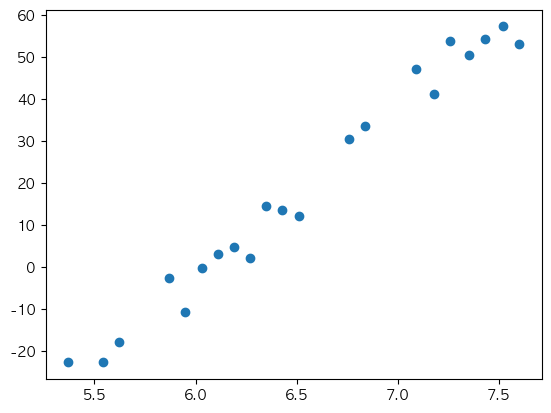

In [98]:
plt.scatter(train_input,train_target)
plt.show()

---
## 선형회귀

In [99]:
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [100]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9774828853645059
0.9466229850067167


In [101]:
# Feature 를 제공한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [102]:
print(train_poly.shape,test_poly.shape)

(21, 2) (7, 2)


In [103]:
# Model 생성
lr = LinearRegression()

lr.fit(train_poly,train_target)


LinearRegression()

In [104]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9775019287000747
0.943992542368971


In [105]:

lr.predict([[8.2**2,8.2]])

array([83.46003851])

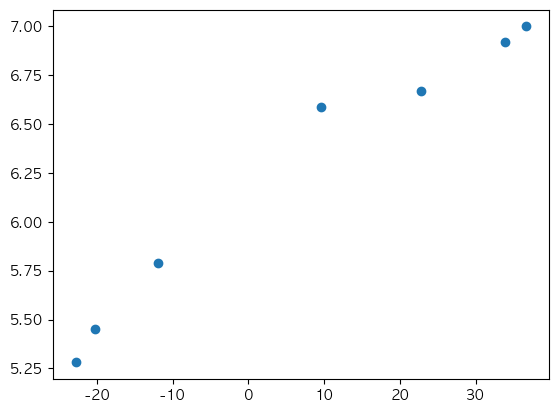

In [106]:
plt.scatter(test_target ,test_input)
plt.show()

In [107]:
predictions = lr.predict([[8.1]])

# 예측값 출력
print("추세 예측값:", predictions)

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

In [ ]:
data

,Year,sealevel,co2,Population,Thickness,북극 해빙면적 평균,해상 평균 온도,지구 평균 온도,평균 해상 강수량
0,1990,-22.847396,22849.92,5.28,2.035898,9.668333,16.578333,18.078333,93.641667
1,1991,-22.814062,23056.40,5.37,2.025763,9.742500,16.541667,18.073333,93.216667
2,1992,-20.247396,22988.29,5.45,2.024229,10.099167,16.380000,18.010000,93.225000
3,1993,-22.780729,23124.00,5.54,1.934320,9.810000,16.402500,18.022500,92.508333
4,1994,-17.980729,23260.29,5.62,1.974827,9.989167,16.380000,18.030000,92.841667
5,1996,-11.947396,24214.92,5.79,1.896918,9.799167,16.461667,18.033333,93.675000
6,1997,-2.647396,25292.92,5.87,1.935293,9.616667,16.588333,18.178333,96.033333
7,1998,-10.814063,24895.32,5.95,1.830868,9.626667,16.685833,18.230833,96.666667
8,1999,-0.247396,24957.30,6.03,1.770938,9.693333,16.413333,18.031667,93.850000
9,2000,2.952604,25637.87,6.11,1.750909,9.457500,16.460833,18.065833,96.416667


In [ ]:
data['sealevel']

0    -22.847396
1    -22.814062
2    -20.247396
3    -22.780729
4    -17.980729
5    -11.947396
6     -2.647396
7    -10.814063
8     -0.247396
9      2.952604
10     4.719271
11     2.152604
12    14.619271
13    13.652604
14    12.119271
15     9.519271
16    22.785937
17    30.452604
18    33.652604
19    33.878240
20    36.718471
21    47.173903
22    41.337987
23    53.857372
24    50.461706
25    54.346964
26    57.355991
27    53.085122
Name: sealevel, dtype: float64

## 과소적합

---
### 규제 

In [108]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [109]:
ridge = Ridge(alpha=3)
ridge.fit(train_scaled,train_target)
print("train score :",ridge.score(train_scaled,train_target))
print("test score :",ridge.score(test_scaled,test_target))

train score : 0.9622097152806856
test score : 0.9578442349710227


In [110]:
print(ridge.coef_)
print(ridge.intercept_)

[23.23970048]
18.793119191952364


In [111]:
23.00670586 * 2+15.127774837

61.141186557

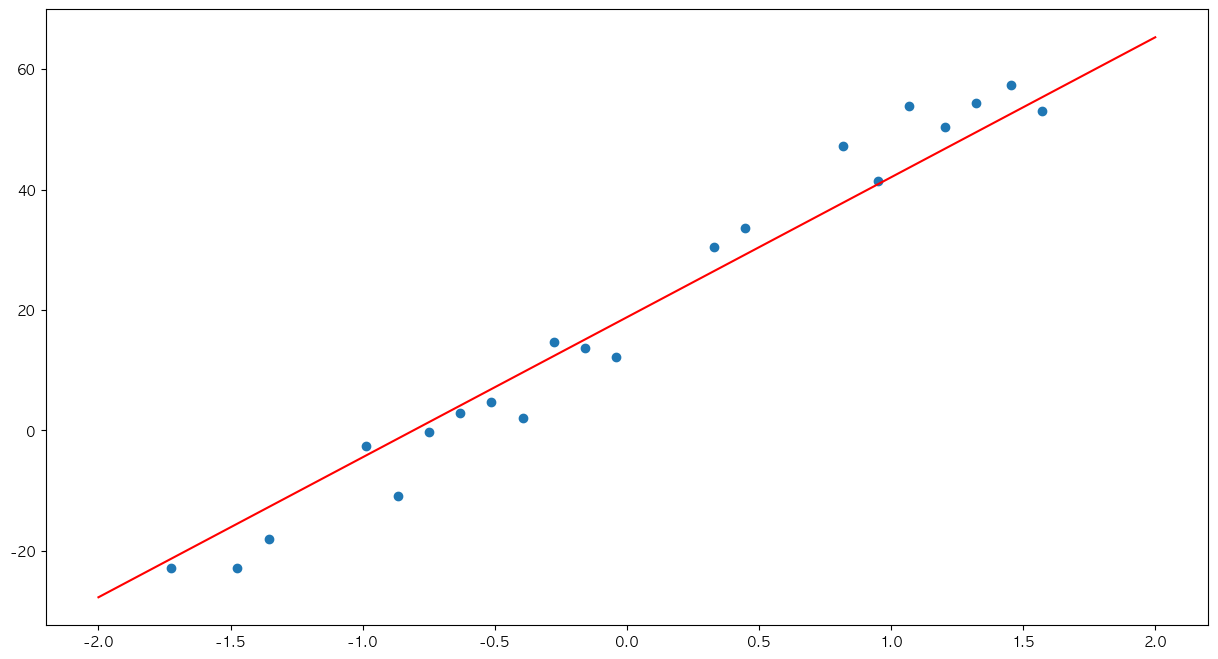

In [112]:
plt.figure(figsize=(15, 8))
plt.scatter(train_scaled,train_target)
plt.plot([-2,2],[-2*ridge.coef_+ ridge.intercept_,2*ridge.coef_+ ridge.intercept_],c='red')
plt.show()

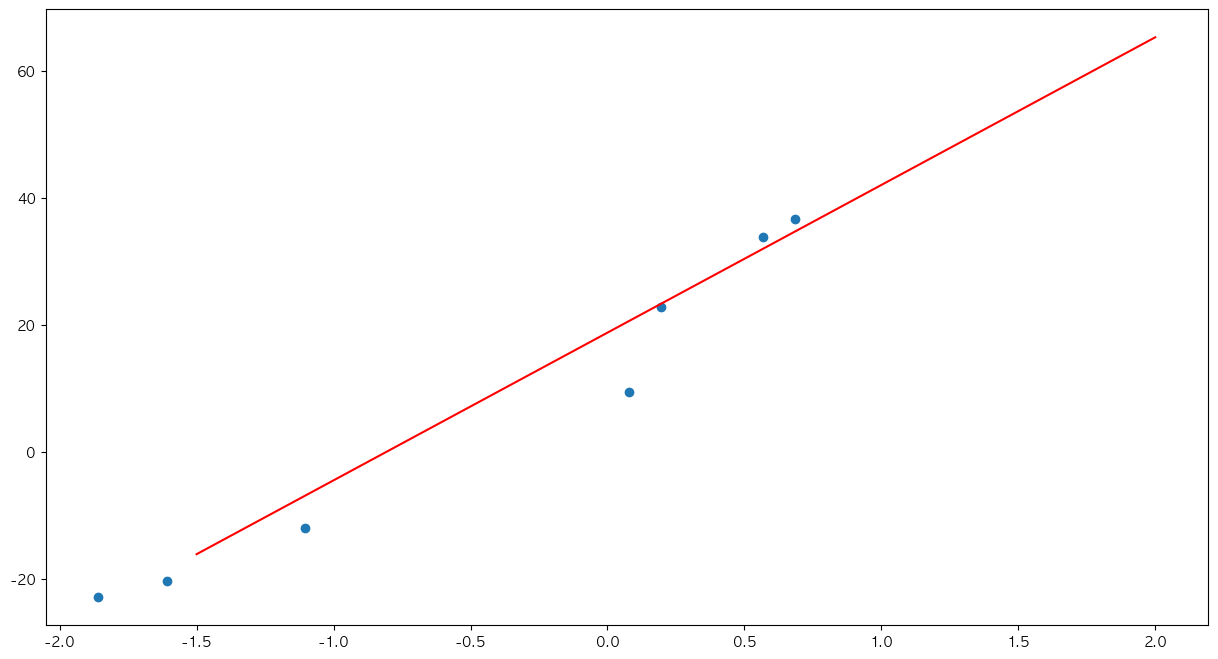

In [113]:
plt.figure(figsize=(15, 8))
plt.scatter(test_scaled,test_target)
plt.plot([-1.5,2.0],[-1.5*ridge.coef_+ ridge.intercept_,2.0*ridge.coef_+ ridge.intercept_],c='red')
plt.show()

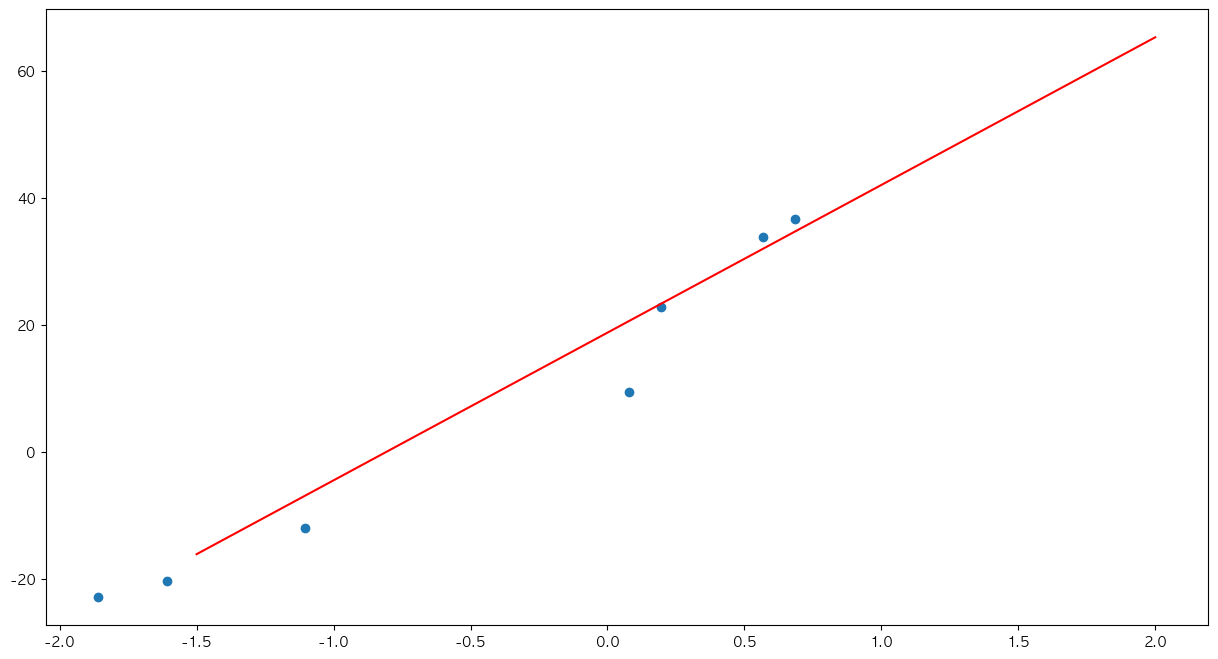

In [114]:
plt.figure(figsize=(15, 8))
plt.scatter(test_scaled,test_target)
plt.plot([-1.5,2.0],[-1.5*ridge.coef_+ ridge.intercept_,2.0*ridge.coef_+ ridge.intercept_],c='red')
plt.show()